<a href="https://colab.research.google.com/github/georgywasiat/Student-Graduation-Trends-A-Data-Mining-Perspective/blob/main/Student_Graduation_Trends_A_Data_Mining_Perspective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Georgy Banny Rizky Wasiat

24060121140103

# Business Understanding

Tujuan utama dari analisis data ini adalah untuk menggali informasi terkait mahasiswa lulus tepat (dan melebihi) waktu, mencakup: tren mahasiswa lulus tepat waktu, faktor-faktor yang mempengaruhi mahasiswa lulus tepat waktu, identifikasi kelompok dengan pola tertentu. Hasil dari analisis data mining dapat membantu, secara umum sebagai dasar dalam mengembangkan kebijakan-kebijakan untuk meningkatkan jumlah mahasiswa lulus tepat waktu di FSM. Secara khusus membantu dalam perencanaan strategis, pengambilan keputusan operasional, dan evaluasi kebijakan di fakultas dan program studi.

# Data Understanding

Mengimpor Library Yang Dibutuhkan

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
!pip install spacy
!python -m spacy download xx_ent_wiki_sm
import spacy
from spacy.lang.id.stop_words import STOP_WORDS
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
!pip install nltk
import nltk
nltk.download('stopwords')
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import _tree

2023-12-15 12:38:48.878108: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 12:38:48.878180: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 12:38:48.911709: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 12:38:48.955689: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-15 12:38:51.776762: W tensorflow/compiler/tf2

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mengumpulkan Data dari berbagai sumber

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')


Mounted at /content/drive


Mengimpor Data Training

In [ ]:
train = pd.read_csv('/content/drive/My Drive/projek datmin/train_datmin.csv')

train_df = pd.DataFrame(train)

Mengimpor Data Testing

In [ ]:
test = pd.read_csv('/content/drive/My Drive/projek datmin/test_datmin.csv')

test_df = pd.DataFrame(test) #data ini yang akan digunakan untuk disubmit dikaggle

Mendeskripsikan Data Training

In [ ]:
train.head(20)

,index,nimhstrlsm,nmmhstrlsm,tplhrtrlsm,tglhrtrlsm,straamsjen,nmpstmspst,llsketrlsm,nlipktrlsm,toefltrlsm,...,kdjenmsjen,nmjenmsjen,gelarmspst,kursitrlsm,pemb1trlsm,pemb2trlsm,kdpsttrlsm,kdpstmspst,jalur,tepat_waktu
0,3037,24040112140089,Anonymous,Semarang,1994-02-16 00:00:00,S1,Fisika,6360,3.24,400,...,2,Sarjana,SARJANA SAINS (S.Si.),86.0,"Dr. Agus Subagio, M.Si",NaN,J2D,J2D,4,True
1,2063,24020111130037,Anonymous,Tegal,1993-04-25 00:00:00,S1,Biologi,6100,3.48,400,...,2,Sarjana,SARJANA SAINS (S.Si.),45.0,"Dr. Sri Widodo AS, M.Si","Dra. Sri Haryanti, M.Si",J2B,J2B,2,False
2,2382,J2A009001,Anonymous,Kota Waringin Barat,1991-10-05 00:00:00,S1,Matematika,4923,3.05,400,...,2,Sarjana,SARJANA SAINS (S.Si.),NaN,"Siti Khabibah, M.Sc","Bambang Irawanto, M.Si",J2A,J2A,0,True
3,2770,J2D008004,Anonymous,Tanah Datar,1990-06-05 00:00:00,S1,Fisika,5307,3.06,420,...,2,Sarjana,SARJANA SAINS (S.Si.),NaN,"Dr. Eng. Udi Harmoko, M.Si","Ir. Sugeng Widada, M.Si",J2D,J2D,0,False
4,3259,J2F008128,Anonymous,Kab. Semarang,1989-09-09 00:00:00,S1,Ilmu Komputer,6047,2.88,400,...,2,Sarjana,SARJANA SAINS (S.Si.),198.0,"Indra Waspada, M.Ti",NaN,J2F,J2F,0,False
5,1627,24040114120018,Anonymous,Semarang,1996-12-17 00:00:00,S1,Fisika,7784,3.63,400,...,2,Sarjana,SARJANA SAINS (S.Si.),37.0,"Prof. Dr. Heri Sutanto, M.Si",NaN,J2D,J2D,4,True
6,2702,J2A009027,Anonymous,Kudus,1991-10-18 00:00:00,S1,Matematika,5232,3.18,410,...,2,Sarjana,SARJANA SAINS (S.Si.),NaN,"Prof. Dr. Widowati, M.Si","Bambang Irawanto, M.Si",J2A,J2A,0,False
7,949,24020112140071,Anonymous,Dumai,1993-07-19 00:00:00,S1,Biologi,6862,3.52,470,...,2,Sarjana,SARJANA SAINS (S.Si.),19.0,"Dr. Hermin Pancasakti K, M.Si","Dr.rer.nat. Anto Budiharjo, M.Biotech",J2B,J2B,2,False
8,1047,24010114120026,Anonymous,Semarang,1996-09-03 00:00:00,S1,Matematika,7921,3.25,420,...,2,Sarjana,SARJANA SAINS (S.Si.),67.0,"Siti Khabibah, M.Sc","Farikhin, PhD",J2A,J2A,1,True
9,1227,24010311120009,Anonymous,Cilacap,1993-06-29 00:00:00,S1,Ilmu Komputer,8101,3.42,410,...,2,Sarjana,SARJANA SAINS (S.Si.),222.0,"Dr. Aris Puji W, M.T",NaN,J2F,J2F,1,False


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        3368 non-null   int64  
 1   nimhstrlsm   3368 non-null   object 
 2   nmmhstrlsm   3368 non-null   object 
 3   tplhrtrlsm   3368 non-null   object 
 4   tglhrtrlsm   3368 non-null   object 
 5   straamsjen   3368 non-null   object 
 6   nmpstmspst   3368 non-null   object 
 7   llsketrlsm   3368 non-null   int64  
 8   nlipktrlsm   3368 non-null   float64
 9   toefltrlsm   3368 non-null   int64  
 10  noijftrlsm   0 non-null      float64
 11  stwsdtrlsm   3368 non-null   int64  
 12  noijutrlsm   0 non-null      float64
 13  alamtrlsm    3368 non-null   object 
 14  noteltrlsm   113 non-null    object 
 15  nmorttrlsm   3366 non-null   object 
 16  skriptrlsm   3366 non-null   object 
 17  phototrlsm   3368 non-null   object 
 18  jcutitrlsm   3368 non-null   int64  
 19  tgijat

In [ ]:
train_df.describe()

,index,llsketrlsm,nlipktrlsm,toefltrlsm,noijftrlsm,stwsdtrlsm,noijutrlsm,jcutitrlsm,tahuntrlsm,preditrlsm,skrettrlsm,kdjektrlsm,nipnsmsfak,nipn1msfak,kdjenmsjen,kursitrlsm,jalur
count,3368.000000,3368.000000,3368.000000,3368.000000,0.0,3368.000000,0.0,3368.000000,2925.000000,3368.000000,1.0,3368.000000,3.368000e+03,3.368000e+03,3368.0,2237.000000,3368.000000
mean,1980.408254,6454.398456,3.308052,423.972090,NaN,0.121437,NaN,0.000891,2011.648889,3.426960,400.0,1.630048,1.969021e+17,1.963111e+17,2.0,117.025034,1.619359
std,1144.164997,1220.417128,0.298505,45.198389,NaN,0.327591,NaN,0.038525,1.941378,0.904405,NaN,0.482863,9.601425e+01,3.200475e+01,0.0,193.534081,1.407268
min,0.000000,515.000000,2.330000,0.000000,NaN,0.000000,NaN,0.000000,2005.000000,2.000000,400.0,1.000000,1.969021e+17,1.963111e+17,2.0,0.000000,0.000000
25%,982.750000,5394.750000,3.090000,400.000000,NaN,0.000000,NaN,0.000000,2010.000000,2.000000,400.0,1.000000,1.969021e+17,1.963111e+17,2.0,40.000000,1.000000
50%,1990.500000,6465.000000,3.325000,417.000000,NaN,0.000000,NaN,0.000000,2012.000000,4.000000,400.0,2.000000,1.969021e+17,1.963111e+17,2.0,77.000000,1.000000
75%,2964.500000,7589.250000,3.530000,443.000000,NaN,0.000000,NaN,0.000000,2013.000000,4.000000,400.0,2.000000,1.969021e+17,1.963111e+17,2.0,119.000000,3.000000
max,3962.000000,8535.000000,4.000000,610.000000,NaN,2.000000,NaN,2.000000,2031.000000,4.000000,400.0,2.000000,1.969021e+17,1.963111e+17,2.0,1113.000000,6.000000


In [ ]:
train_df.isna().sum()

index             0
nimhstrlsm        0
nmmhstrlsm        0
tplhrtrlsm        0
tglhrtrlsm        0
straamsjen        0
nmpstmspst        0
llsketrlsm        0
nlipktrlsm        0
toefltrlsm        0
noijftrlsm     3368
stwsdtrlsm        0
noijutrlsm     3368
alamtrlsm         0
noteltrlsm     3255
nmorttrlsm        2
skriptrlsm        2
phototrlsm        0
jcutitrlsm        0
tgijatrlsm        0
tahuntrlsm      443
preditrlsm        0
skrettrlsm     3367
tgrettrlsm        0
kdjektrlsm        0
dekanmsfak        0
nipnsmsfak        0
nmfakmsfak        0
kdfakmsfak        0
pdek1msfak        0
nipn1msfak        0
nmtgamsjen        0
kdjenmsjen        0
nmjenmsjen        0
gelarmspst        0
kursitrlsm     1131
pemb1trlsm        4
pemb2trlsm      868
kdpsttrlsm        0
kdpstmspst        0
jalur             0
tepat_waktu       0
dtype: int64

Mendeskripsikan Data Testing

In [ ]:
test.head(20)

,index,nimhstrlsm,nmmhstrlsm,tplhrtrlsm,tglhrtrlsm,straamsjen,nmpstmspst,llsketrlsm,nlipktrlsm,toefltrlsm,...,nmtgamsjen,kdjenmsjen,nmjenmsjen,gelarmspst,kursitrlsm,pemb1trlsm,pemb2trlsm,kdpsttrlsm,kdpstmspst,jalur
0,1603,24030113140104,Anonymous,Jakarat,1995-04-01 00:00:00,S1,Kimia Murni,7819,2.79,400,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),125.0,"Dra. Enny Fachriyah, M.Si","Dra. Dewi Kusrini, M.Si",J2C,J2C,3
1,1040,24010114120007,Anonymous,Pekalongan,1996-08-19 00:00:00,S1,Matematika,7914,3.26,423,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),65.0,"Prof. Dr. Widowati, M.Si","Drs. YD Sumanto, M.Si",J2A,J2A,1
2,450,24020113120019,Anonymous,Semarang,1995-07-17 00:00:00,S1,Biologi,7123,3.55,473,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),NaN,"Drs. Agung Suprihadi, M.Si","Dr. Drs. Wijanarka, M.Si",J2B,J2B,2
3,3894,24040115120027,Anonymous,Cilacap,1997-08-31 00:00:00,S1,Fisika,8466,3.33,400,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),144.0,"Much. Azam, m.Si","Drs. K. Sofjan Firdausi, M.Sc",J2D,J2D,4
4,3030,24040111130036,Anonymous,Bandung,1993-03-28 00:00:00,S1,Fisika,6352,3.04,490,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),91.0,Dr. Eng. Udi Harmoko,NaN,J2D,J2D,4
5,1163,24040114140108,Anonymous,Jepara,1996-03-01 00:00:00,S1,Fisika,8037,3.46,430,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),195.0,"V. Gunawan S K, PhD",NaN,J2D,J2D,4
6,3722,24020113130113,Anonymous,Sukoharjo,1994-09-28 00:00:00,S1,Biologi,7442,3.36,400,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),65.0,"Joko Purwono, B.Sc","Dr. Yulita Nurchayati, M.Si",J2B,J2B,2
7,2434,J2D008013,Anonymous,Penyabungan,1991-09-11 00:00:00,S1,Fisika,4970,3.24,483,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),NaN,"Dr. Eng Udi Harmoko, M.Si",NaN,J2D,J2D,0
8,3769,24040113120018,Anonymous,Gisting,1995-10-28 00:00:00,S1,Fisika,7489,3.48,410,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),98.0,"Dr. Eng. Hendri Widiyandari, M.Si",NaN,J2D,J2D,4
9,3429,J2B009033,Anonymous,Blora,1991-05-20 00:00:00,S1,Biologi,5389,3.16,403,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),80.0,"Dr. Erma Prihastanti, M.Si","Dr. Sri Widodo Agung S, M.Si",J2B,J2B,0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       595 non-null    int64  
 1   nimhstrlsm  595 non-null    object 
 2   nmmhstrlsm  595 non-null    object 
 3   tplhrtrlsm  595 non-null    object 
 4   tglhrtrlsm  595 non-null    object 
 5   straamsjen  595 non-null    object 
 6   nmpstmspst  595 non-null    object 
 7   llsketrlsm  595 non-null    int64  
 8   nlipktrlsm  595 non-null    float64
 9   toefltrlsm  595 non-null    int64  
 10  noijftrlsm  0 non-null      float64
 11  stwsdtrlsm  595 non-null    int64  
 12  noijutrlsm  0 non-null      float64
 13  alamtrlsm   595 non-null    object 
 14  noteltrlsm  22 non-null     object 
 15  nmorttrlsm  595 non-null    object 
 16  skriptrlsm  594 non-null    object 
 17  phototrlsm  595 non-null    object 
 18  jcutitrlsm  595 non-null    int64  
 19  tgijatrlsm  595 non-null    o

In [ ]:
test_df.describe()

,index,llsketrlsm,nlipktrlsm,toefltrlsm,noijftrlsm,stwsdtrlsm,noijutrlsm,jcutitrlsm,tahuntrlsm,preditrlsm,kdjektrlsm,nipnsmsfak,nipn1msfak,kdjenmsjen,kursitrlsm,jalur
count,595.00000,595.000000,595.000000,595.000000,0.0,595.000000,0.0,595.0,514.000000,595.000000,595.000000,5.950000e+02,5.950000e+02,595.0,398.000000,595.000000
mean,1984.34958,6483.104202,3.309126,422.794958,NaN,0.126050,NaN,0.0,2011.678988,3.435294,1.620168,1.969021e+17,1.963111e+17,2.0,141.002513,1.522689
std,1145.11452,1222.291789,0.301753,52.311245,NaN,0.332185,NaN,0.0,1.971549,0.901046,0.485753,0.000000e+00,3.202692e+01,0.0,239.754477,1.379530
min,3.00000,4354.000000,2.380000,0.000000,NaN,0.000000,NaN,0.0,2006.000000,2.000000,1.000000,1.969021e+17,1.963111e+17,2.0,2.000000,0.000000
25%,1051.50000,5404.000000,3.100000,400.000000,NaN,0.000000,NaN,0.0,2010.000000,2.000000,1.000000,1.969021e+17,1.963111e+17,2.0,40.000000,0.000000
50%,1927.00000,6532.000000,3.310000,417.000000,NaN,0.000000,NaN,0.0,2012.000000,4.000000,2.000000,1.969021e+17,1.963111e+17,2.0,83.000000,1.000000
75%,3015.50000,7680.500000,3.540000,443.000000,NaN,0.000000,NaN,0.0,2013.000000,4.000000,2.000000,1.969021e+17,1.963111e+17,2.0,121.750000,3.000000
max,3957.00000,8530.000000,3.950000,573.000000,NaN,1.000000,NaN,0.0,2015.000000,4.000000,2.000000,1.969021e+17,1.963111e+17,2.0,1108.000000,6.000000


In [ ]:
test_df.isna().sum()

index           0
nimhstrlsm      0
nmmhstrlsm      0
tplhrtrlsm      0
tglhrtrlsm      0
straamsjen      0
nmpstmspst      0
llsketrlsm      0
nlipktrlsm      0
toefltrlsm      0
noijftrlsm    595
stwsdtrlsm      0
noijutrlsm    595
alamtrlsm       0
noteltrlsm    573
nmorttrlsm      0
skriptrlsm      1
phototrlsm      0
jcutitrlsm      0
tgijatrlsm      0
tahuntrlsm     81
preditrlsm      0
skrettrlsm    594
tgrettrlsm      0
kdjektrlsm      0
dekanmsfak      0
nipnsmsfak      0
nmfakmsfak      0
kdfakmsfak      0
pdek1msfak      0
nipn1msfak      0
nmtgamsjen      0
kdjenmsjen      0
nmjenmsjen      0
gelarmspst      0
kursitrlsm    197
pemb1trlsm      0
pemb2trlsm    167
kdpsttrlsm      0
kdpstmspst      0
jalur           0
dtype: int64

# Data Preparation

Data Preparation untuk Data Training

Memilih atribut yang sekiranya mempunyai nilai numerik untuk nantinya dibuat model

In [ ]:
# Mengganti nilai TRUE dengan 1 dan FALSE dengan 0 agar bisa membangun korelasi matriks
train_df['tepat_waktu'] = train_df['tepat_waktu'].replace({True: 1, False: 0})

In [ ]:
kelulusan_numerik = train_df[['llsketrlsm', 'nlipktrlsm' , 'toefltrlsm', 'stwsdtrlsm', 'tahuntrlsm', 'preditrlsm', 'kdjektrlsm', 'jalur','kursitrlsm', 'tepat_waktu']]

kelulusan_numerik_df = pd.DataFrame(kelulusan_numerik)

kelulusan_numerik.head(20)

,llsketrlsm,nlipktrlsm,toefltrlsm,stwsdtrlsm,tahuntrlsm,preditrlsm,kdjektrlsm,jalur,kursitrlsm,tepat_waktu
0,6360,3.24,400,0,2012.0,4,1,4,86.0,1
1,6100,3.48,400,0,2011.0,4,2,2,45.0,0
2,4923,3.05,400,0,2009.0,4,2,0,NaN,1
3,5307,3.06,420,0,2008.0,4,1,0,NaN,0
4,6047,2.88,400,0,2008.0,4,2,0,198.0,0
5,7784,3.63,400,0,2014.0,2,2,4,37.0,1
6,5232,3.18,410,0,2009.0,4,2,0,NaN,0
7,6862,3.52,470,0,2012.0,2,2,2,19.0,0
8,7921,3.25,420,0,2014.0,4,2,1,67.0,1
9,8101,3.42,410,0,2011.0,4,2,1,222.0,0


Mengecek Nilai Null

In [ ]:
kelulusan_numerik.isna().sum()

llsketrlsm        0
nlipktrlsm        0
toefltrlsm        0
stwsdtrlsm        0
tahuntrlsm      443
preditrlsm        0
kdjektrlsm        0
jalur             0
kursitrlsm     1131
tepat_waktu       0
dtype: int64

Mengisi nilai null pada 'tahuntrlsm' dengan Nilai Minimum

In [ ]:
# Isi nilai null dengan nilai minimum dari kolom 'tahuntrlsm'
min_value = kelulusan_numerik_df['tahuntrlsm'].min()
kelulusan_numerik_df['tahuntrlsm'].fillna(min_value, inplace=True)

kelulusan_numerik_df = kelulusan_numerik_df.copy()

# Tampilkan DataFrame setelah perubahan
print(kelulusan_numerik_df)

      llsketrlsm  nlipktrlsm  toefltrlsm  stwsdtrlsm  tahuntrlsm  preditrlsm  \
0           6360        3.24         400           0      2012.0           4   
1           6100        3.48         400           0      2011.0           4   
2           4923        3.05         400           0      2009.0           4   
3           5307        3.06         420           0      2008.0           4   
4           6047        2.88         400           0      2008.0           4   
...          ...         ...         ...         ...         ...         ...   
3363        4384        3.39         400           1      2005.0           4   
3364        7070        3.51         440           0      2011.0           4   
3365        7782        3.56         427           0      2014.0           2   
3366        5944        3.40         433           0      2011.0           4   
3367        7903        3.65         430           0      2011.0           4   

      kdjektrlsm  jalur  kursitrlsm  te

Mengisi nilai null pada 'kursitrlsm' dengan Nilai Rata2

In [ ]:
# Isi nilai null dengan nilai rata-rata dari kolom 'kursitrlsm'
mean_value = kelulusan_numerik_df['kursitrlsm'].mean()
kelulusan_numerik_df['kursitrlsm'].fillna(mean_value, inplace=True)


kelulusan_numerik = kelulusan_numerik_df.copy()

# Tampilkan DataFrame setelah perubahan
print(kelulusan_numerik_df)



      llsketrlsm  nlipktrlsm  toefltrlsm  stwsdtrlsm  tahuntrlsm  preditrlsm  \
0           6360        3.24         400           0      2012.0           4   
1           6100        3.48         400           0      2011.0           4   
2           4923        3.05         400           0      2009.0           4   
3           5307        3.06         420           0      2008.0           4   
4           6047        2.88         400           0      2008.0           4   
...          ...         ...         ...         ...         ...         ...   
3363        4384        3.39         400           1      2005.0           4   
3364        7070        3.51         440           0      2011.0           4   
3365        7782        3.56         427           0      2014.0           2   
3366        5944        3.40         433           0      2011.0           4   
3367        7903        3.65         430           0      2011.0           4   

      kdjektrlsm  jalur  kursitrlsm  te

Mengecek Kembali Apakah Ada Nilai Null

In [ ]:
kelulusan_numerik.isna().sum()

llsketrlsm     0
nlipktrlsm     0
toefltrlsm     0
stwsdtrlsm     0
tahuntrlsm     0
preditrlsm     0
kdjektrlsm     0
jalur          0
kursitrlsm     0
tepat_waktu    0
dtype: int64

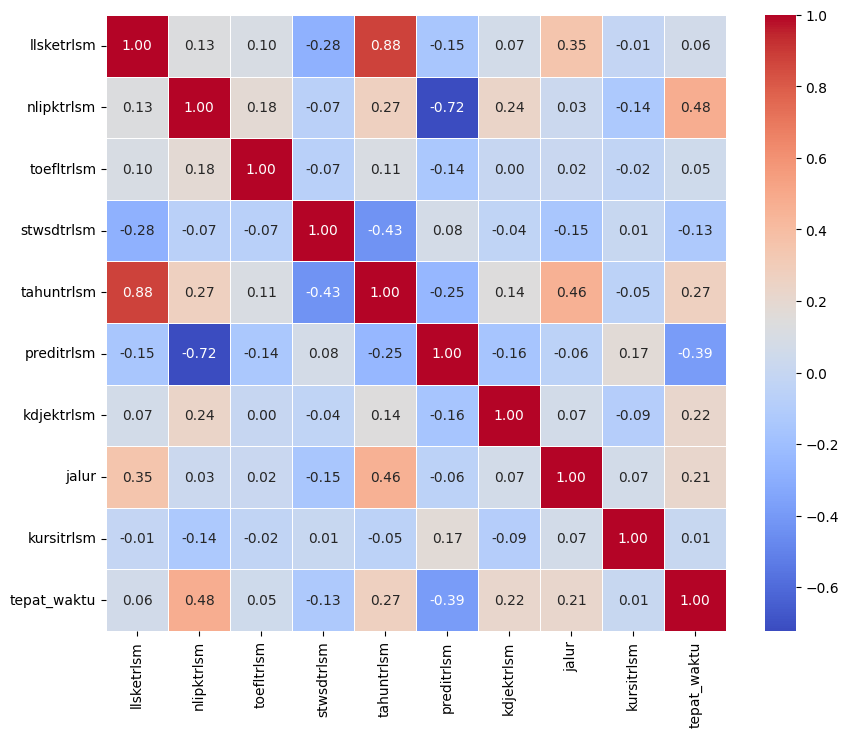

In [ ]:
# Buat matriks korelasi
matriks_korelasi = kelulusan_numerik_df.corr()

# Setel ukuran gambar
plt.figure(figsize=(10, 8))

# Buat heatmap matriks korelasi dengan seaborn
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Tampilkan visualisasi
plt.show()

In [ ]:
# Pisahkan atribut dan label
X = kelulusan_numerik.drop('tepat_waktu', axis=1)  # Atribut
y = kelulusan_numerik['tepat_waktu']  # Label

In [ ]:
# Mengganti nilai 0 dengan False dan nilai 1 dengan True pada kolom 'tepat_waktu'
kelulusan_numerik_df['tepat_waktu'] = kelulusan_numerik_df['tepat_waktu'].replace({0: False, 1: True})

# Tampilkan DataFrame setelah perubahan
print(kelulusan_numerik_df)

      llsketrlsm  nlipktrlsm  toefltrlsm  stwsdtrlsm  tahuntrlsm  preditrlsm  \
0           6360        3.24         400           0      2012.0           4   
1           6100        3.48         400           0      2011.0           4   
2           4923        3.05         400           0      2009.0           4   
3           5307        3.06         420           0      2008.0           4   
4           6047        2.88         400           0      2008.0           4   
...          ...         ...         ...         ...         ...         ...   
3363        4384        3.39         400           1      2005.0           4   
3364        7070        3.51         440           0      2011.0           4   
3365        7782        3.56         427           0      2014.0           2   
3366        5944        3.40         433           0      2011.0           4   
3367        7903        3.65         430           0      2011.0           4   

      kdjektrlsm  jalur  kursitrlsm  te

In [ ]:
# Menampilkan distribusi kelas pada kolom 'tepat_waktu'
kelas_distribusi = kelulusan_numerik_df['tepat_waktu'].value_counts()

# Tampilkan distribusi kelas
print(kelas_distribusi)

False    1818
True     1550
Name: tepat_waktu, dtype: int64


Membagi Data Dengan Data Validasi Untuk Menvalidasi Model

In [ ]:
# Bagi data menjadi set training dan validasi (80% training, 20% validasi)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan ukuran set training dan validasi
print("Ukuran set training:", len(X_train))
print("Ukuran set validasi:", len(X_valid))

Ukuran set training: 2694
Ukuran set validasi: 674


**Pada Langkah Ini Akan dilakukan data preparation untuk data testing**

memilih atribut yang sekiranya penting

In [ ]:
kelulusan_test = test_df[['llsketrlsm', 'nlipktrlsm', 'tahuntrlsm',]]
kelulusan_test_df = pd.DataFrame(kelulusan_test)

In [ ]:
kelulusan_test.head(20)

,llsketrlsm,nlipktrlsm,tahuntrlsm
0,7819,2.79,2013.0
1,7914,3.26,2014.0
2,7123,3.55,2013.0
3,8466,3.33,2015.0
4,6352,3.04,2011.0
5,8037,3.46,2014.0
6,7442,3.36,2013.0
7,4970,3.24,2008.0
8,7489,3.48,2013.0
9,5389,3.16,2009.0


In [ ]:
kelulusan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   llsketrlsm  595 non-null    int64  
 1   nlipktrlsm  595 non-null    float64
 2   tahuntrlsm  514 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 14.1 KB


In [ ]:
kelulusan_test.isna().sum()

llsketrlsm     0
nlipktrlsm     0
tahuntrlsm    81
dtype: int64

Mengisi nilai null pada tahuntrlsm dengan nilai minimum

In [ ]:
# Isi nilai null dengan nilai minimum dari kolom 'tahuntrlsm'
min_value = kelulusan_test_df['tahuntrlsm'].min()
kelulusan_test_df['tahuntrlsm'].fillna(min_value, inplace=True)

kelulusan_test = kelulusan_test_df.copy()

# Tampilkan DataFrame setelah perubahan
print(kelulusan_test_df)

     llsketrlsm  nlipktrlsm  tahuntrlsm
0          7819        2.79      2013.0
1          7914        3.26      2014.0
2          7123        3.55      2013.0
3          8466        3.33      2015.0
4          6352        3.04      2011.0
..          ...         ...         ...
590        7971        2.93      2014.0
591        6331        3.39      2012.0
592        5816        3.63      2011.0
593        6030        3.72      2011.0
594        6539        3.55      2012.0

[595 rows x 3 columns]


In [ ]:
kelulusan_test.isna().sum()

llsketrlsm    0
nlipktrlsm    0
tahuntrlsm    0
dtype: int64

In [ ]:
X_new_test = kelulusan_test

In [ ]:
index = test_df[['index']]
print(index)

     index
0     1603
1     1040
2      450
3     3894
4     3030
..     ...
590   1097
591   3010
592   2211
593   3274
594   1352

[595 rows x 1 columns]


# Modelling

Modeling di data validasinya

In [ ]:
# Inisialisasi model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)

# Latih model pada set training
model_dt.fit(X_train, y_train)

# Lakukan prediksi pada set validasi
y_pred_valid = model_dt.predict(X_valid)

# Hitung akurasi pada set validasi
accuracy_valid = accuracy_score(y_valid, y_pred_valid)

# Tampilkan akurasi
print("Akurasi pada set validasi:", accuracy_valid)

Akurasi pada set validasi: 0.9243323442136498


# Evaluasi

Mengetahui Atribut yang penting untuk memprediksi ulang sehingga diharapkan akurasi naik

In [ ]:
# Tampilkan tingkat kepentingan setiap atribut
feature_importances = pd.DataFrame({
    'Atribut': X.columns,
    'Bobot': model_dt.feature_importances_
})

print("\nTingkat Kepentingan Atribut:")
print(feature_importances)


Tingkat Kepentingan Atribut:
      Atribut     Bobot
0  llsketrlsm  0.327086
1  nlipktrlsm  0.225868
2  toefltrlsm  0.020884
3  stwsdtrlsm  0.022542
4  tahuntrlsm  0.214065
5  preditrlsm  0.045749
6  kdjektrlsm  0.017419
7       jalur  0.072646
8  kursitrlsm  0.053741


Bobot tertinggi atribut yaitu llkesterlsm, nlipktrlsm, dan tahuntrlsm

In [ ]:
atribut_pilihan = kelulusan_numerik_df[['llsketrlsm', 'nlipktrlsm', 'tahuntrlsm', 'tepat_waktu' ]]
atribut_pilihan_df = pd.DataFrame(atribut_pilihan)

# Pisahkan atribut dan label
X_new = atribut_pilihan.drop('tepat_waktu', axis=1)  # Atribut
y_new = atribut_pilihan['tepat_waktu']  # Label

# Bagi data menjadi set training dan validasi (80% training, 20% validasi)
X_train_new, X_valid_new, y_train, y_valid = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

Akurasi dengan atribut pilihan yang bobotnya tinggi

In [ ]:
# Inisialisasi model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)

# Latih model pada set training
model_dt.fit(X_train_new, y_train)

# Lakukan prediksi pada set validasi
y_pred_valid = model_dt.predict(X_valid_new)

# Hitung akurasi pada set validasi
accuracy_valid = accuracy_score(y_valid, y_pred_valid)

# Tampilkan akurasi
print("Akurasi pada set validasi:", accuracy_valid)

Akurasi pada set validasi: 0.9376854599406528


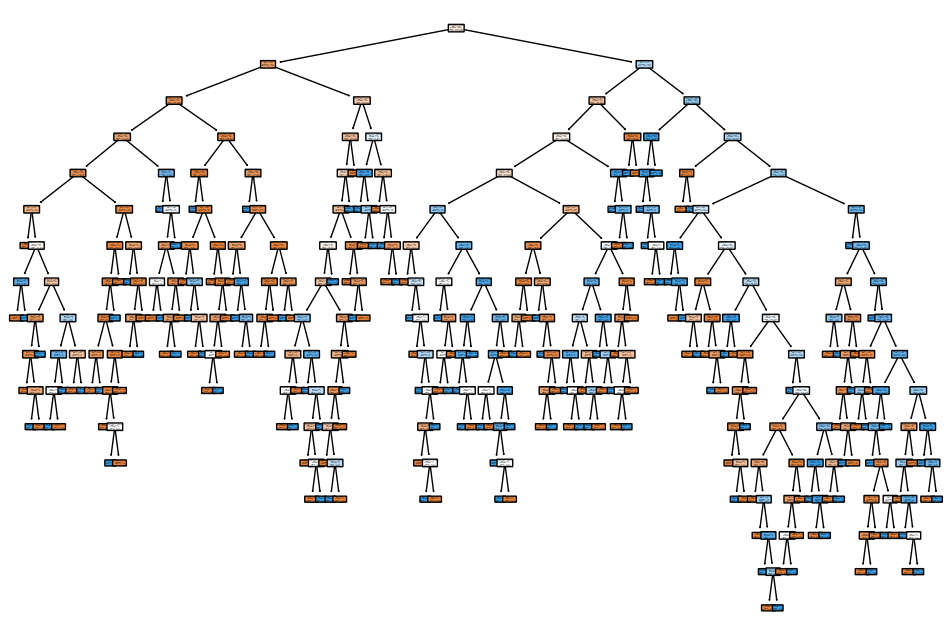

In [ ]:
# Inisialisasi model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)

# Latih model pada set training
model_dt.fit(X_train_new, y_train)

# Visualisasi pohon keputusan
plt.figure(figsize=(12, 8))
plot_tree(model_dt, feature_names=X_train_new.columns, class_names=['Non-Fraud', 'Fraud'], filled=True, rounded=True)
plt.show()


Memprediksi dengan data Testing untuk dikumpulkan ke Kaggle

In [ ]:
# Inisialisasi model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)

# Latih model pada set training
model_dt.fit(X_train_new, y_train)

# Lakukan prediksi pada set validasi
y_pred = model_dt.predict(X_new_test)

print(y_pred)

[False  True  True  True False  True False False False False False False
 False False False False False  True False False  True  True  True False
 False  True  True  True False  True False  True False False False False
 False  True False  True  True False  True False False  True False False
 False  True  True False  True False False  True  True False False False
 False False False False  True False False  True  True  True False False
 False False False False False False  True  True  True  True  True False
  True False  True  True  True False False False  True  True  True False
 False  True  True False  True  True False False False False  True  True
 False False False False  True  True  True  True False  True  True False
  True False False False  True False  True  True  True  True  True False
  True False False False False  True  True False  True  True  True  True
  True  True  True  True  True  True False  True False  True  True  True
  True False  True False  True False  True False Fa

In [ ]:
output = pd.DataFrame({'index': index['index'], 'tepat_waktu' : y_pred})
print(output)

     index  tepat_waktu
0     1603        False
1     1040         True
2      450         True
3     3894         True
4     3030        False
..     ...          ...
590   1097         True
591   3010         True
592   2211         True
593   3274         True
594   1352         True

[595 rows x 2 columns]


# Deployment

Deployment atau implementasi dalam CRISP-DM (Cross-Industry Standard Process for Data Mining) adalah tahapan di mana model atau solusi yang telah dikembangkan dan dievaluasi diimplementasikan ke dalam produksi atau lingkungan operasional. Hasil nya diharapkan dapat membantu, secara umum sebagai dasar dalam mengembangkan kebijakan-kebijakan untuk meningkatkan jumlah mahasiswa lulus tepat waktu di FSM. Secara khusus membantu dalam perencanaan strategis, pengambilan keputusan operasional, dan evaluasi kebijakan di fakultas dan program studi.

# Menjawab Pertanyaan Business Understanding

In [ ]:
# Ganti nilai 0 dengan False dan nilai 1 dengan True pada kolom 'tepat_waktu'
train_df['tepat_waktu'] = train_df['tepat_waktu'].replace({0: False, 1: True})

Apakah terdapat pola distribusi IPK?

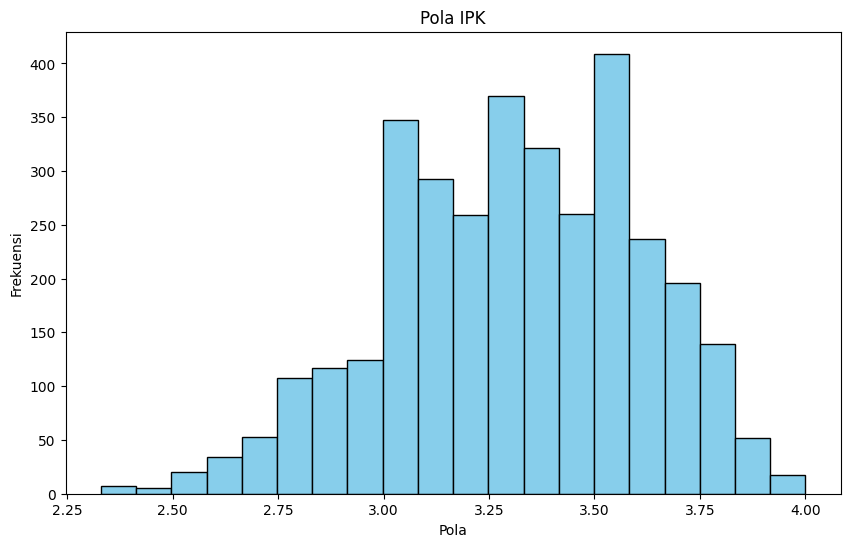

In [ ]:
# Menggunakan Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(train_df['nlipktrlsm'], bins=20, color='skyblue', edgecolor='black')
plt.title('Pola IPK')
plt.xlabel('Pola')
plt.ylabel('Frekuensi')
plt.show()


Bagaimana sebaran nilai IPK?

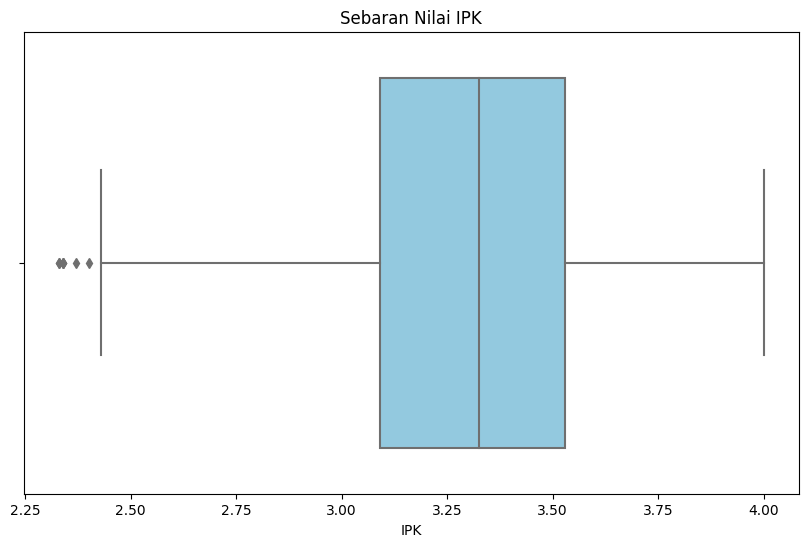

In [ ]:
# Menggunakan Seaborn untuk membuat box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['nlipktrlsm'], color='skyblue')
plt.title('Sebaran Nilai IPK')
plt.xlabel('IPK')
plt.show()

In [ ]:
# Menggabungkan kategori 'Informatika' dan 'Ilmu Komputer'
train_df['nmpstmspst'] = train_df['nmpstmspst'].replace({'Informatika': 'Informatika/Ilmu Komputer',
                                                                 'Ilmu Komputer': 'Informatika/Ilmu Komputer'})

# Verifikasi perubahan
print(train_df['nmpstmspst'].unique())


['Fisika' 'Biologi' 'Matematika' 'Informatika/Ilmu Komputer' 'Statistika'
 'Kimia Murni' 'Kimia']


Apakah terdapat hubungan antara IPK dengan lama studi?

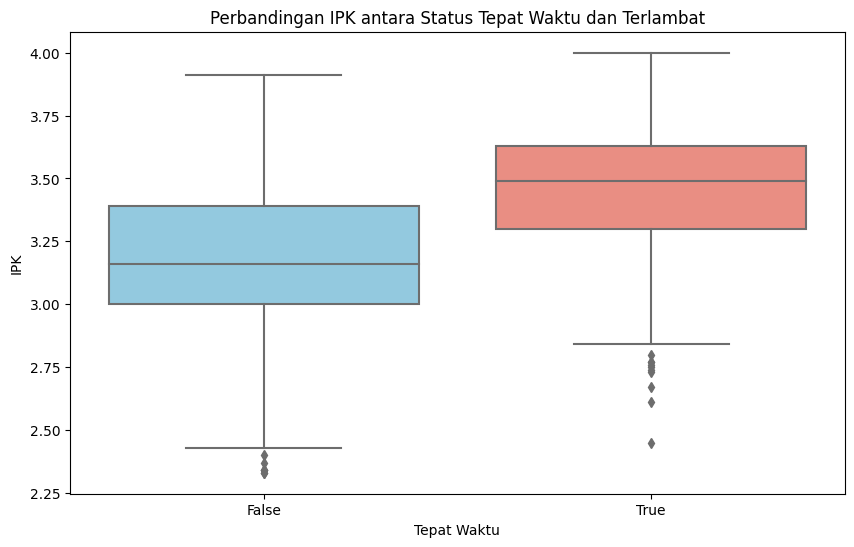

In [ ]:
# Menggunakan Seaborn untuk membuat box plot dengan pemisahan berdasarkan 'tepat_waktu'
plt.figure(figsize=(10, 6))
sns.boxplot(x='tepat_waktu', y='nlipktrlsm', data=train_df, palette=['skyblue', 'salmon'])
plt.title('Perbandingan IPK antara Status Tepat Waktu dan Terlambat')
plt.xlabel('Tepat Waktu')
plt.ylabel('IPK')
plt.show()

Bagaimana korelasi antara kedua variabel ini?

In [ ]:
# Menghitung korelasi antara 'nlipktrlsm' dan 'tepat_waktu'
correlation = np.corrcoef(train_df['nlipktrlsm'], train_df['tepat_waktu'])[0, 1]

print(f"Korelasi antara IPK dan Tepat Waktu: {correlation}")


Korelasi antara IPK dan Tepat Waktu: 0.47707021110641223


Bagaimana tren mahasiswa tepat waktu di antara program studi?

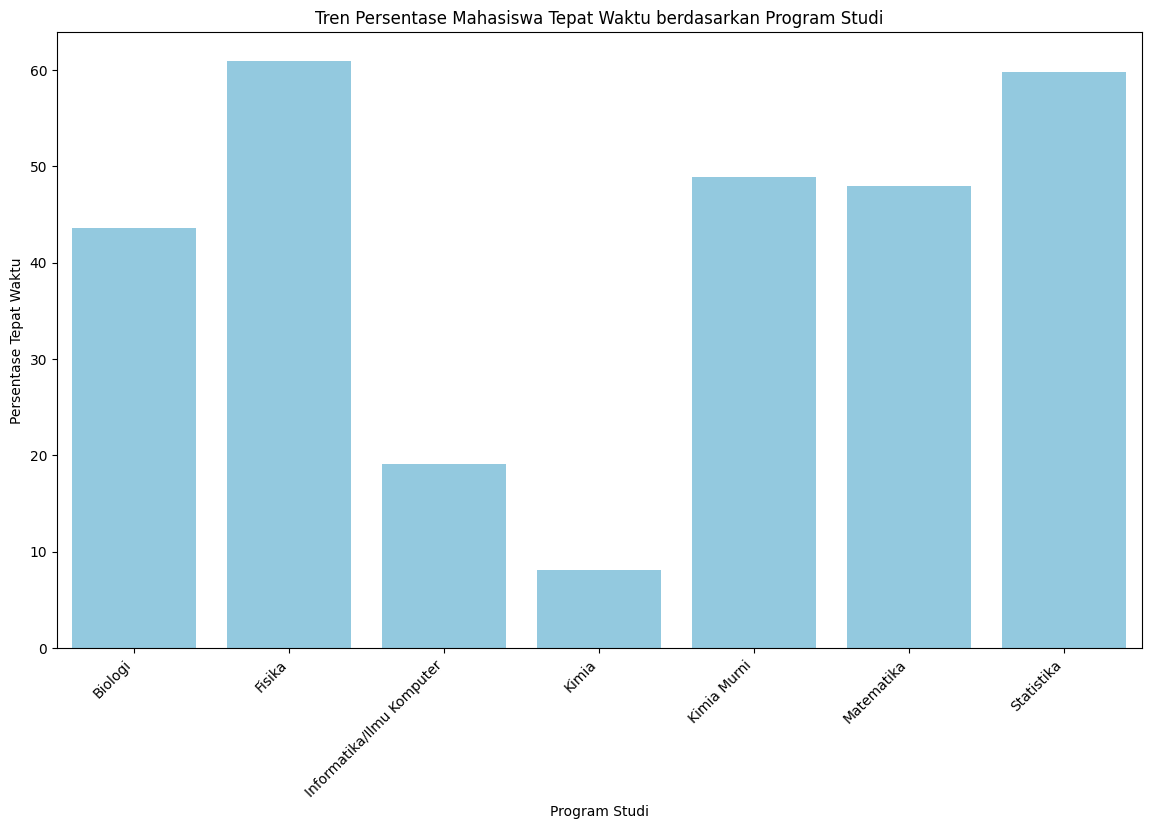

In [ ]:
# Menghitung jumlah mahasiswa tepat waktu dan total mahasiswa untuk setiap program studi
tepat_waktu_data = train_df.groupby(['nmpstmspst', 'tepat_waktu']).size().unstack()

# Menghitung persentase mahasiswa tepat waktu untuk setiap program studi
tepat_waktu_data['persentase_tepat_waktu'] = (tepat_waktu_data[True] / (tepat_waktu_data[True] + tepat_waktu_data[False])) * 100

# Bar Plot untuk persentase mahasiswa tepat waktu
plt.figure(figsize=(14, 8))
sns.barplot(x=tepat_waktu_data.index, y=tepat_waktu_data['persentase_tepat_waktu'], color='skyblue')
plt.title('Tren Persentase Mahasiswa Tepat Waktu berdasarkan Program Studi')
plt.xlabel('Program Studi')
plt.ylabel('Persentase Tepat Waktu')
plt.xticks(rotation=45, ha='right')
plt.show()


Apakah terdapat perbedaan signifikan lama studi di antara program studi?

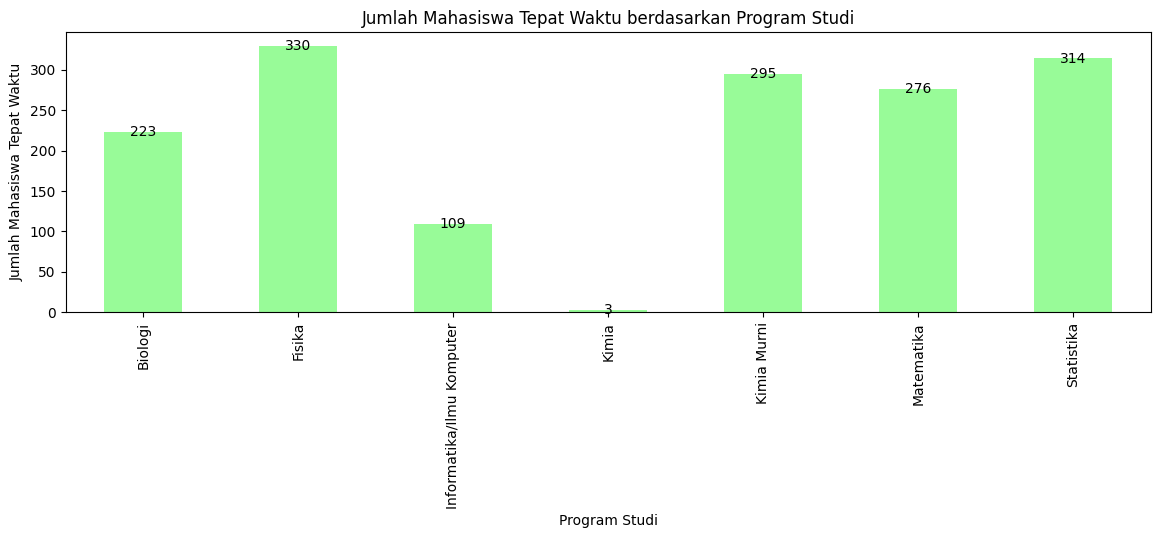

In [ ]:
# Menghitung jumlah mahasiswa tepat waktu dan tidak tepat waktu untuk setiap program studi
tepat_waktu_counts = train_df.groupby(['nmpstmspst', 'tepat_waktu']).size().unstack()

# Bar Plot Tepat Waktu
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
tepat_waktu_counts[True].plot(kind='bar', color='#98FB98')
plt.title('Jumlah Mahasiswa Tepat Waktu berdasarkan Program Studi')
plt.xlabel('Program Studi')
plt.ylabel('Jumlah Mahasiswa Tepat Waktu')

# Menambahkan label angka pada setiap batang Tepat Waktu
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')


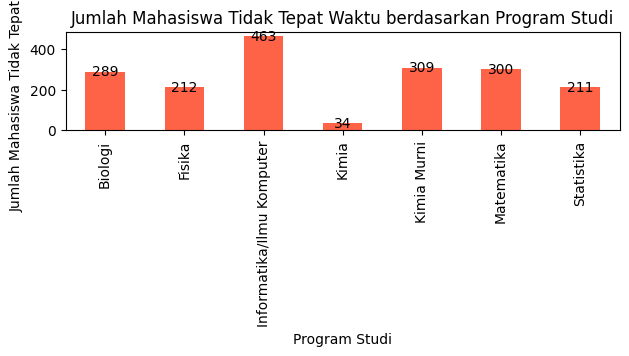

In [ ]:
# Bar Plot Tidak Tepat Waktu
plt.subplot(2, 1, 2)
tepat_waktu_counts[False].plot(kind='bar', color='#FF6347')
plt.title('Jumlah Mahasiswa Tidak Tepat Waktu berdasarkan Program Studi')
plt.xlabel('Program Studi')
plt.ylabel('Jumlah Mahasiswa Tidak Tepat Waktu')

# Menambahkan label angka pada setiap batang Tidak Tepat Waktu
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

plt.tight_layout()
plt.show()

Topik Umum Pemilihan Skripsi

In [ ]:
# Ganti nilai 2031 dengan 2013 di kolom 'tahuntrlsm'
train_df['tahuntrlsm'] = train_df['tahuntrlsm'].replace(2031, 2013)

In [ ]:
topik_skripsi = train_df['skriptrlsm']

topik_skripsi_df = pd.DataFrame(topik_skripsi)

topik_skripsi.head(50)

0     Pengaruh Variasi Temperatur Deposisi Nanokompo...
1     Keanekaragaman Tumbuhan Berdasarkan Ciri Morfo...
2     Pelabelan Selisih Kuadrat pada Graf Khusus yan...
3     Identifikasi Struktur Bawah Permukaan Mengguna...
4     Aplikasi Pemilihan Penerima beasiswa Menggunak...
5     Studi pembangunan Aktivitas Fotokatalitik Mate...
6     Solusi Analitik Model Dispersi Polutan Tiga Di...
7     Karakterisasi Molekuler Pisang Merah Musa sp. ...
8     Model Optimasi EOQ untuk barang yang Mengalami...
9     Analisis Sentimen pada Twiteer Mengenai Pelaya...
10    Pengaruh Kombinasi Salinitas dan Limbah Cair T...
11    Impleemtasi ALgoritma Advanced Encrtyption Sta...
12    Ketepatan Klasifikasi Status Pemberian Air Sus...
13    Sistem Pakar Diagnosis Kerusakan Mesin Mobil T...
14    Model Infeksi HIV Sel-TCD4+ dengan Terapi Anti...
15    Penentuan Laju Pengikisan Limbah Jarum Suntik ...
16    Subsemimodul pada Struktur ALjabar dan Aspek T...
17    Kontruksi Model Matematika Hubungan antara

In [ ]:
# Menampilkan baris dengan nilai NaN pada kolom 'skriptrlsm'
nan_rows = topik_skripsi_df[topik_skripsi_df['skriptrlsm'].isna()]
print(nan_rows)

# Menggantikan nilai NaN dengan string kosong
topik_skripsi_df['skriptrlsm'] = topik_skripsi_df['skriptrlsm'].fillna('')

     skriptrlsm
2357        NaN
3163        NaN


metode      776
studi       418
sistem      370
analisis    335
pengaruh    300
model       284
aplikasi    253
semarang    242
fuzzy       194
jawa        186
dtype: int64


Text(0.5, 1.0, 'Word Cloud Kata-kata Kunci Topik Skripsi')

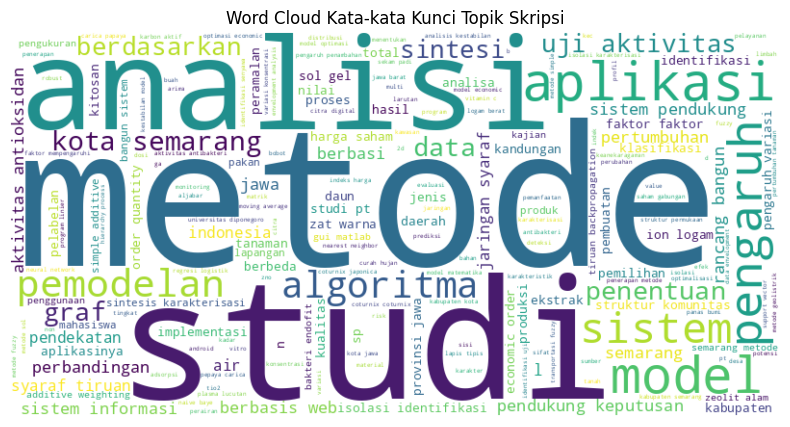

In [ ]:
# Menggabungkan semua teks topik skripsi menjadi satu teks besar
all_topics_text = ' '.join(topik_skripsi_df['skriptrlsm'])

# Menggunakan spaCy untuk melakukan pemrosesan bahasa dengan model alternatif
nlp = spacy.load("xx_ent_wiki_sm")
doc = nlp(all_topics_text)

# Menggabungkan semua teks topik skripsi menjadi satu teks besar
all_topics_text = ' '.join(topik_skripsi_df['skriptrlsm'])

# Menggunakan spaCy untuk melakukan pemrosesan bahasa dengan model alternatif
nlp = spacy.load("xx_ent_wiki_sm")
doc = nlp(all_topics_text)

# Membuat daftar kata-kata kunci dengan mengabaikan kata-kata stop
keywords = [token.text.lower() for token in doc if token.text.lower() not in STOP_WORDS and not token.is_punct]

# Menghitung frekuensi kata-kata
keyword_freq = pd.Series(keywords).value_counts()

# Menampilkan kata-kata kunci yang paling umum
print(keyword_freq.head(10))

# Membuat Word Cloud dari kata-kata kunci
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(keywords))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata-kata Kunci Topik Skripsi')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        3368 non-null   int64  
 1   nimhstrlsm   3368 non-null   object 
 2   nmmhstrlsm   3368 non-null   object 
 3   tplhrtrlsm   3368 non-null   object 
 4   tglhrtrlsm   3368 non-null   object 
 5   straamsjen   3368 non-null   object 
 6   nmpstmspst   3368 non-null   object 
 7   llsketrlsm   3368 non-null   int64  
 8   nlipktrlsm   3368 non-null   float64
 9   toefltrlsm   3368 non-null   int64  
 10  noijftrlsm   0 non-null      float64
 11  stwsdtrlsm   3368 non-null   int64  
 12  noijutrlsm   0 non-null      float64
 13  alamtrlsm    3368 non-null   object 
 14  noteltrlsm   113 non-null    object 
 15  nmorttrlsm   3366 non-null   object 
 16  skriptrlsm   3366 non-null   object 
 17  phototrlsm   3368 non-null   object 
 18  jcutitrlsm   3368 non-null   int64  
 19  tgijat

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
pip install nltk


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Menggantikan nilai NaN dengan string kosong
topik_skripsi_df['skriptrlsm'] = topik_skripsi_df['skriptrlsm'].fillna('')

In [ ]:
# Pembersihan nilai-nilai NaN
train_df['skriptrlsm'] = train_df['skriptrlsm'].fillna('')

# Pra-pemrosesan Teks
def preprocess_text(text):
    # Tokenisasi
    tokens = word_tokenize(text.lower())
    # Hapus stop words dan karakter non-alfanumerik
    stop_words = set(stopwords.words('indonesian'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return tokens

train_df['tokens'] = train_df['skriptrlsm'].apply(preprocess_text)

# Analisis Frekuensi Kata
all_words = [word for tokens in train_df['tokens'] for word in tokens]
freq_dist = FreqDist(all_words)

# Tampilkan topik-topik paling umum per tahun
years = sorted(train_df['tahuntrlsm'].unique())

for year in years:
    subset_df = train_df[train_df['tahuntrlsm'] == year]
    all_tokens = [token for tokens in subset_df['tokens'] for token in tokens]
    freq_dist_subset = FreqDist(all_tokens)

    top_topics = freq_dist_subset.most_common(5)  # Ganti 5 dengan jumlah topik yang ingin ditampilkan
    print(f"Tren Skripsi Tahun {year}: {top_topics}")


Tren Skripsi Tahun 2005.0: [('pengaruh', 1), ('kalsium', 1), ('hormon', 1), ('auksin', 1), ('giberelin', 1)]
Tren Skripsi Tahun 2006.0: [('aplikasi', 5), ('sistem', 5), ('graf', 5), ('data', 3), ('metode', 3)]
Tren Skripsi Tahun 2007.0: [('analisis', 7), ('metode', 4), ('graf', 4), ('semarang', 4), ('citra', 4)]
Tren Skripsi Tahun 2008.0: [('metode', 29), ('studi', 25), ('aplikasi', 23), ('sistem', 19), ('semarang', 14)]
Tren Skripsi Tahun 2009.0: [('metode', 37), ('graf', 32), ('studi', 30), ('analisis', 28), ('sistem', 24)]
Tren Skripsi Tahun 2010.0: [('metode', 129), ('studi', 60), ('analisis', 59), ('sistem', 58), ('semarang', 48)]
Tren Skripsi Tahun 2011.0: [('metode', 111), ('studi', 47), ('analisis', 43), ('model', 42), ('pengaruh', 37)]
Tren Skripsi Tahun 2012.0: [('metode', 127), ('studi', 66), ('pengaruh', 57), ('analisis', 54), ('sistem', 53)]
Tren Skripsi Tahun 2013.0: [('metode', 125), ('studi', 68), ('sistem', 63), ('pengaruh', 56), ('model', 44)]
Tren Skripsi Tahun 2014.

Bagaimana distribusi mahasiswa berdasarkan lokasi asal?

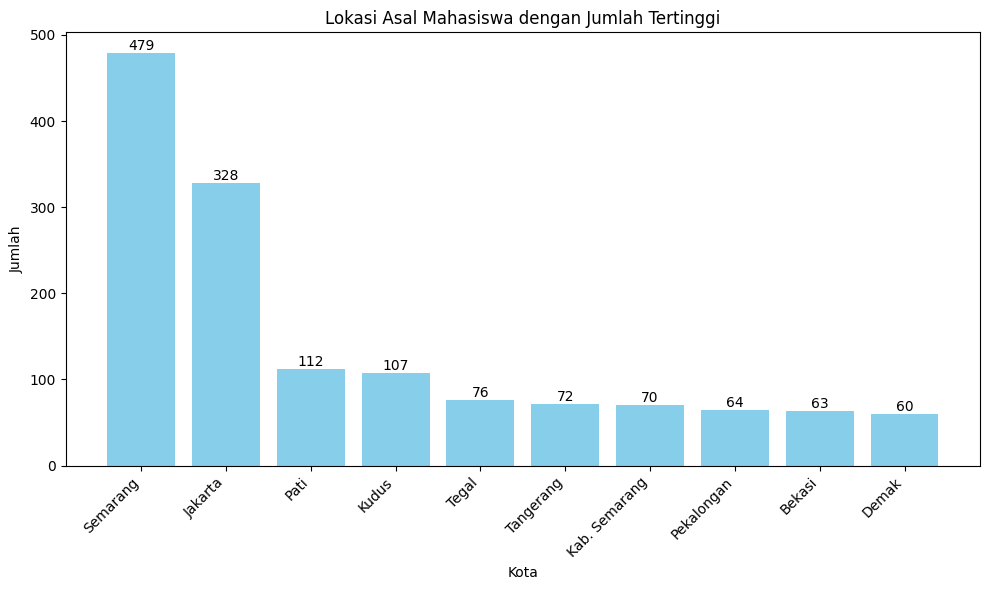

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah 'tplhrtrlsm' untuk setiap nilai
jumlah_kota = train_df['tplhrtrlsm'].value_counts().reset_index()
jumlah_kota.columns = ['Kota', 'Jumlah']

# Mengambil 10 kota pertama
top_10_kota = jumlah_kota.head(10)

# Membuat grafik batang dengan label
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_kota['Kota'], top_10_kota['Jumlah'], color='skyblue')

# Menambahkan label di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Kota')
plt.ylabel('Jumlah')
plt.title('Lokasi Asal Mahasiswa dengan Jumlah Tertinggi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Menampilkan grafik
plt.show()


Apakah tedapat korelasi antara lokasi asal dengan TOEFL, IPK, dan lama studi (tepat_waktu)

Untuk mencari korelasi matriks antara lokasi asal dan tepat waktu, maka nama kotanya dijadikan numerik terlebih dahulu

In [ ]:
# Mengganti nilai 0 dengan False dan nilai 1 dengan True pada kolom 'tepat_waktu' pada salinan DataFrame
train1_df = train_df.copy()
train1_df['tepat_waktu'] = train1_df['tepat_waktu'].replace({False : 0, True:1})


In [ ]:
# Mengonversi atribut kategorikal menjadi nilai numerik menggunakan pengkodean label
train1_df['tplhrtrlsm'] = train1_df['tplhrtrlsm'].astype('category').cat.codes

# Menghitung jumlah 'tplhrtrlsm' untuk setiap nilai numerik
jumlah_kota = train1_df['tplhrtrlsm'].value_counts().reset_index()
jumlah_kota.columns = ['Nilai_Numerik', 'Jumlah']

# Menampilkan jumlah 'tplhrtrlsm' untuk setiap nilai numerik
print(jumlah_kota)

     Nilai_Numerik  Jumlah
0              318     479
1              107     328
2              258     112
3              171     107
4              389      76
..             ...     ...
436            420       1
437            230       1
438            231       1
439            335       1
440            220       1

[441 rows x 2 columns]


In [ ]:
# Menghitung korelasi antara 'asal kota' dan 'tepat_waktu'
correlation = np.corrcoef(train1_df['tplhrtrlsm'], train1_df['tepat_waktu'])[0, 1]

print(f"Korelasi antara asal kota dan Tepat Waktu: {correlation}")

Korelasi antara asal kota dan Tepat Waktu: -0.0028837962608055643


In [ ]:
# Menghitung korelasi antara 'toefl' dan 'tepat_waktu'
correlation = np.corrcoef(train1_df['toefltrlsm'], train1_df['tepat_waktu'])[0, 1]

print(f"Korelasi antara toefl dan Tepat Waktu: {correlation}")

Korelasi antara toefl dan Tepat Waktu: 0.04699698052247507


In [ ]:
# Menghitung korelasi antara 'ipk' dan 'tepat_waktu'
correlation = np.corrcoef(train1_df['nlipktrlsm'], train1_df['tepat_waktu'])[0, 1]

print(f"Korelasi antara IPK dan Tepat Waktu: {correlation}")

Korelasi antara IPK dan Tepat Waktu: 0.47707021110641223


Pola Terkait Lama Studi

Apakah terdapat tren mahasiswa lulus tepat waktu?

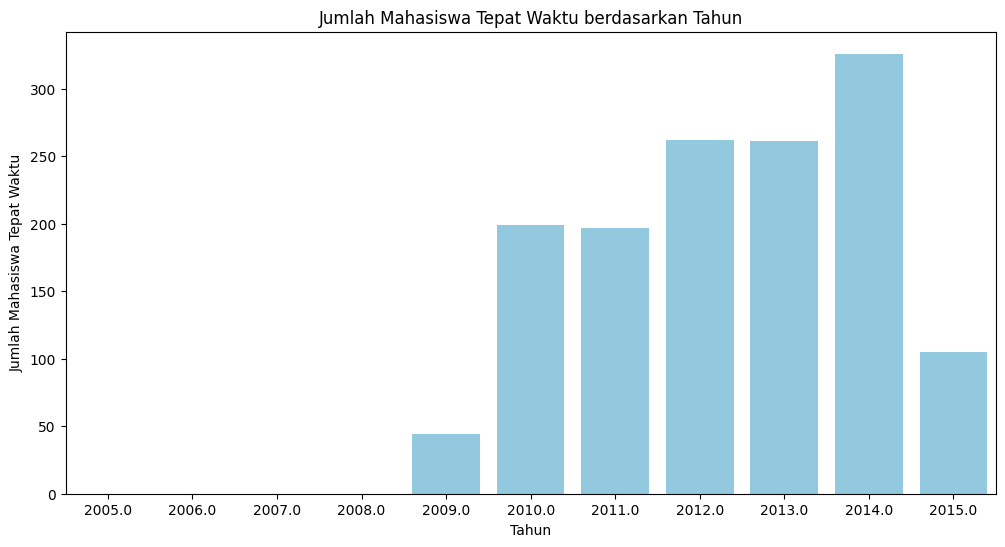

In [ ]:
# Menghitung jumlah mahasiswa tepat waktu dan tidak tepat waktu untuk setiap tahun
tepat_waktu_counts = train_df.groupby(['tahuntrlsm', 'tepat_waktu']).size().unstack()

# Bar Plot untuk Mahasiswa Tepat Waktu
plt.figure(figsize=(12, 6))
sns.barplot(x=tepat_waktu_counts.index, y=tepat_waktu_counts[True], color='skyblue')
plt.title('Jumlah Mahasiswa Tepat Waktu berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Mahasiswa Tepat Waktu')
plt.show()



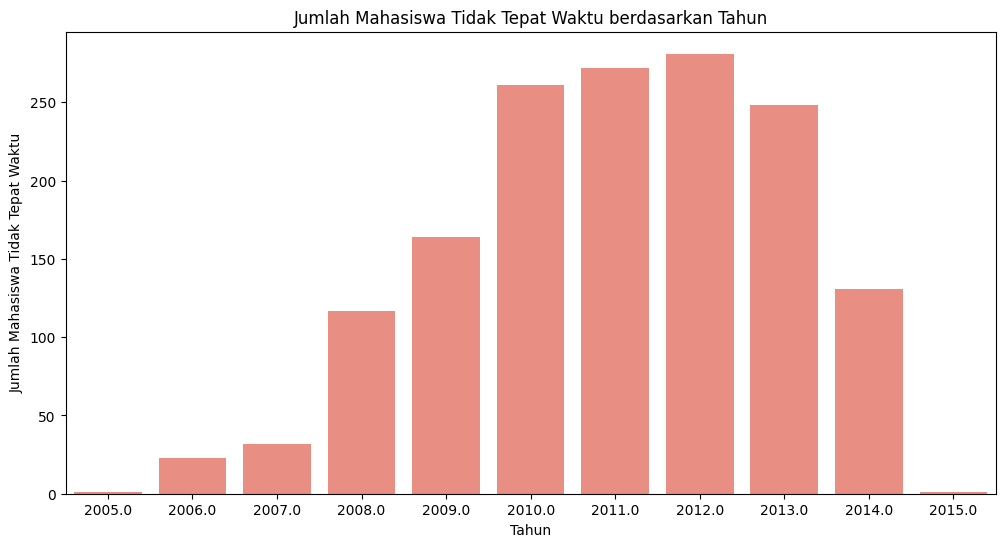

In [ ]:
# Bar Plot untuk Mahasiswa Tidak Tepat Waktu
plt.figure(figsize=(12, 6))
sns.barplot(x=tepat_waktu_counts.index, y=tepat_waktu_counts[False], color='salmon')
plt.title('Jumlah Mahasiswa Tidak Tepat Waktu berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Mahasiswa Tidak Tepat Waktu')
plt.show()

Apakah terdapat kelompok dengan karakteristik tertentu?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


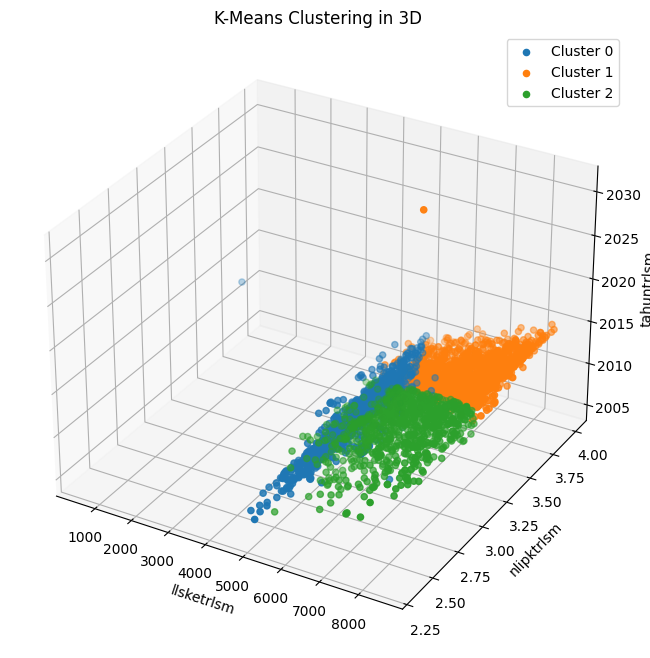

In [ ]:
# Pilih kolom yang akan di-klaster
selected_columns = ['llsketrlsm', 'nlipktrlsm', 'tahuntrlsm']

# Ambil subset DataFrame hanya dengan kolom yang dipilih
subset_df = kelulusan_numerik_df[selected_columns]

# Mengganti nilai yang hilang jika ada
subset_df = subset_df.fillna(0)  # Gantilah dengan nilai yang sesuai

# Standarisasi data menggunakan StandardScaler
scaler = StandardScaler()
subset_scaled = scaler.fit_transform(subset_df)

# Menentukan jumlah klaster yang diinginkan
n_clusters = 3

# Melakukan klasterisasi menggunakan K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
subset_df['cluster_label'] = kmeans.fit_predict(subset_scaled)

# Visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Memisahkan data berdasarkan klaster
for cluster_label in range(n_clusters):
    cluster_data = subset_df[subset_df['cluster_label'] == cluster_label]
    ax.scatter(cluster_data['llsketrlsm'], cluster_data['nlipktrlsm'], cluster_data['tahuntrlsm'], label=f'Cluster {cluster_label}')

# Menambahkan label sumbu
ax.set_xlabel('llsketrlsm')
ax.set_ylabel('nlipktrlsm')
ax.set_zlabel('tahuntrlsm')

# Menampilkan legenda
ax.legend()

plt.title('K-Means Clustering in 3D')
plt.show()


•	Cluster 0 terdiri dari mahasiswa dengan latar belakang llsketrlsm 4000-5000, IPK di kisaran 2.75 hingga 4, dan tahun masuk antara 2005 hingga 2010.

•	Cluster 1 mencakup mahasiswa yang memiliki llsketrlsm 4000-7000, IPK di antara 3.75 hingga 4, dan tahun masuknya adalah antara 2005 hingga 2010.

•	Sementara itu, Cluster 2 adalah kelompok mahasiswa dengan llsketrlsm 4000-7000 dan IPK berkisar antara 2.75 hingga 3.75.



Apakah terdapat faktor-faktor yang mempengaruhi mahasiswa lulus tepat waktu?

In [ ]:
# Fungsi rekursif untuk mengekstrak aturan-aturan dari pohon
def get_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"if {name} <= {threshold:.2f}:")
            recurse(tree_.children_left[node])

            print(f"else:  # if {name} > {threshold:.2f}")
            recurse(tree_.children_right[node])
        else:
            print(f"return {tree_.value[node]}")

    recurse(0)

# Menampilkan aturan-aturan yang mengarah ke 'Tepat Waktu'
print("Rules for 'Tepat Waktu':")
get_rules(model_dt, X_train_new.columns)


Rules for 'Tepat Waktu':
if nlipktrlsm <= 3.22:
if nlipktrlsm <= 3.12:
if llsketrlsm <= 5605.00:
if tahuntrlsm <= 2009.50:
if llsketrlsm <= 4526.00:
if llsketrlsm <= 4423.50:
return [[18.  0.]]
else:  # if llsketrlsm > 4423.50
if llsketrlsm <= 4453.50:
if nlipktrlsm <= 2.81:
return [[1. 0.]]
else:  # if nlipktrlsm > 2.81
return [[0. 6.]]
else:  # if llsketrlsm > 4453.50
if nlipktrlsm <= 3.05:
if llsketrlsm <= 4516.50:
if llsketrlsm <= 4475.00:
return [[7. 0.]]
else:  # if llsketrlsm > 4475.00
if llsketrlsm <= 4486.00:
return [[0. 1.]]
else:  # if llsketrlsm > 4486.00
return [[3. 0.]]
else:  # if llsketrlsm > 4516.50
return [[0. 1.]]
else:  # if nlipktrlsm > 3.05
if llsketrlsm <= 4490.00:
if llsketrlsm <= 4472.00:
if llsketrlsm <= 4465.00:
return [[0. 1.]]
else:  # if llsketrlsm > 4465.00
return [[1. 0.]]
else:  # if llsketrlsm > 4472.00
return [[0. 3.]]
else:  # if llsketrlsm > 4490.00
if llsketrlsm <= 4509.50:
return [[2. 0.]]
else:  # if llsketrlsm > 4509.50
return [[0. 1.]]
else:  #